Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X).
Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). This will be our TARGET (y) variable.
Read the data into a Pandas dataframe. At this point you should have 1000 rows. Number of columns depends on the number of features you chose.
Analyze extracted features (X) and transform them. You may need to encode some categorical variables, or scale numerical variables.
Create a logistic regression model to predict 'rented_in_may' from the cleaned data.
Evaluate the results.

In [1]:
# Import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password = getpass.getpass()

········


In [2]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

query = '''SELECT
    film.*,
    MAX(CASE WHEN rental.rental_date IS NOT NULL THEN 1 ELSE 0 END) AS rented_in_may
FROM
    film
LEFT JOIN
    inventory ON film.film_id = inventory.film_id
LEFT JOIN
    rental ON inventory.inventory_id = rental.inventory_id AND EXTRACT(MONTH FROM rental.rental_date) = 5 AND EXTRACT(YEAR FROM rental.rental_date) = 2005
GROUP BY
    film.film_id, film.rental_rate, film.length, film.rating'''

data = pd.read_sql_query(query, engine)
data.head(50)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,rented_in_may
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,1
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42,0
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42,1
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42,1
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42,1
5,6,AGENT TRUMAN,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,None,3,2.99,169,17.99,PG,Deleted Scenes,2006-02-15 05:03:42,1
6,7,AIRPLANE SIERRA,A Touching Saga of a Hunter And a Butler who m...,2006,1,None,6,4.99,62,28.99,PG-13,"Trailers,Deleted Scenes",2006-02-15 05:03:42,0
7,8,AIRPORT POLLOCK,A Epic Tale of a Moose And a Girl who must Con...,2006,1,None,6,4.99,54,15.99,R,Trailers,2006-02-15 05:03:42,1
8,9,ALABAMA DEVIL,A Thoughtful Panorama of a Database Administra...,2006,1,None,3,2.99,114,21.99,PG-13,"Trailers,Deleted Scenes",2006-02-15 05:03:42,0
9,10,ALADDIN CALENDAR,A Action-Packed Tale of a Man And a Lumberjack...,2006,1,None,6,4.99,63,24.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42,0


In [3]:
data=data.drop(columns=["film_id","description","last_update","language_id","original_language_id","special_features","release_year"])
data

# we first dropped "obvious"columns like film id ,description and last update
#then we dropped language_id because there is only 1 id and original_language_id because it only has none values
#we drop release year because all the movies have been released on the same year
#initially dropping special features,is not clear that it will be usefull and will give a lot of work,but we can always readd it in the future if needed.

,title,rental_duration,rental_rate,length,replacement_cost,rating,rented_in_may
0,ACADEMY DINOSAUR,6,0.99,86,20.99,PG,1
1,ACE GOLDFINGER,3,4.99,48,12.99,G,0
2,ADAPTATION HOLES,7,2.99,50,18.99,NC-17,1
3,AFFAIR PREJUDICE,5,2.99,117,26.99,G,1
4,AFRICAN EGG,6,2.99,130,22.99,G,1
...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,9.99,G,0
996,YOUTH KICK,4,0.99,179,14.99,NC-17,0
997,ZHIVAGO CORE,6,0.99,105,10.99,NC-17,1
998,ZOOLANDER FICTION,5,2.99,101,28.99,R,1


In [4]:
#checking for the null values
data.isna().sum()

title               0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
rented_in_may       0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/y4/rjh7l7d54692f4sprcn4svfh0000gn/T/ipykernel_53295/317744276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


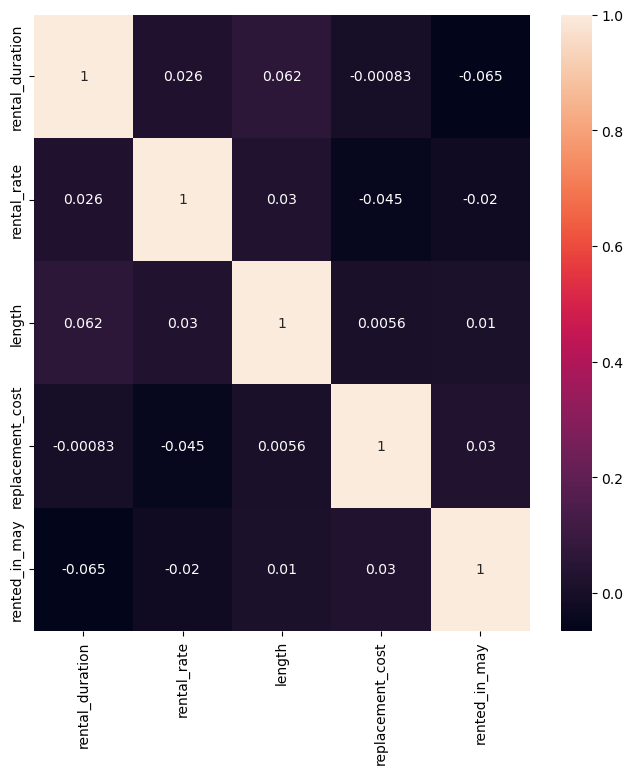

In [6]:
# look for multicolinearity (some columns having almost identical correlation to other variables)
corr_matrix=data.corr()  
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [9]:
# Need to X-y split and train-test-split BEFORE applying transformations, 
# then train transformation on training set only
# we should drop title before one hot encoding because it will cause too many columns
data = data.drop('title', axis =1)

y = data['rented_in_may']
X = data.drop('rented_in_may', axis=1)

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#seperate the numerical value and categorical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

# split numericals and categoricals

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_num.columns)
X_train_norm

,rental_duration,rental_rate,length,replacement_cost
0,0.50,1.0,0.769784,0.70
1,0.75,0.0,0.151079,0.65
2,0.00,0.5,0.258993,1.00
3,0.50,1.0,0.223022,0.70
4,0.25,0.0,0.733813,0.65
...,...,...,...,...
795,0.50,0.0,0.151079,0.70
796,0.00,0.0,0.683453,0.40
797,0.00,1.0,0.467626,0.15
798,0.50,1.0,0.906475,0.70


In [12]:
# encode categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
# we will reuse encoder and cols when encoding the X_test_cat
X_train_cat = pd.DataFrame(encoded_cat, columns=cols)
X_train_cat.head()

,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [14]:
# concat the numerical and categorical data together
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed

array([[0.5       , 1.        , 0.76978417, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.        , 0.15107914, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.5       , 0.25899281, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.4676259 , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.90647482, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.31654676, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [15]:
# Transform the test data
# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns = X_test_num.columns)
X_test_norm.head()

,rental_duration,rental_rate,length,replacement_cost
0,0.00,0.0,0.374101,0.15
1,0.75,0.5,0.964029,0.70
2,0.25,0.5,0.316547,0.45
3,1.00,0.5,0.618705,0.30
4,0.25,0.0,0.453237,0.35


In [16]:
# for categoricals
# onehot encoding reusing the transformer for the test data 
encoded_cat = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat = pd.DataFrame(encoded_cat, columns=cols)
X_test_cat


,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
195,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,1.0
197,1.0,0.0,0.0,0.0
198,1.0,0.0,0.0,0.0


In [18]:
# concat the numerical and categorical data for test data
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)
X_test_transformed

array([[0.        , 0.        , 0.37410072, ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.5       , 0.96402878, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.5       , 0.31654676, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.27338129, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.29496403, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 1.        , 0.4028777 , ..., 0.        , 0.        ,
        1.        ]])

In [19]:
# building regression model
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [20]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.69

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,  62],
       [  0, 138]])

In [24]:
pd.Series(y_test).value_counts()

1    138
0     62
Name: rented_in_may, dtype: int64

## Conclusion


1. we have a decent model, it may be improved with choosing more features.
2. maybe a bigger dataframe will result a beter result
3. the data itself is not balance, so the model will mostly likely choose the majority data 
4. if we can fix the imbalanced data, we might get better prediction model.